# 1. Business Understanding
Tujuan dari analisis ini adalah untuk membandingkan algoritma machine learning(klasifikasi) terbaik untuk mengklasifikasikan penyakit stroke

# 2. Data Understanding

In [2]:
#import library python untuk data science

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load dataset stroke.csv

data = pd.read_csv('datasets/stroke.csv')

# menampilkan 5 data teratas
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# menampilkan tipe data masing-masing atribut
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 3. Data Preparation

In [8]:
# mengecek missing value
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# data cleaning: handling missing value pada atribut bmi
data['bmi'].fillna(data['bmi'].median(), inplace=True)

data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
data.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [21]:
# data reduction: menghilangkan atribut id dan work_type
data = data.dropna()
data = data.drop(['work_type'],axis = 1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


In [22]:
# data transformation: metode manual
data = data.replace("Yes",1)
data = data.replace("No",0)
data = data.replace("Urban",1)
data = data.replace("Rural",0)
data = data.replace(["Male", "Female", "Other"],[1,0,3])
data = data.replace(["formerly smoked", "never smoked", "smokes", "Unknown"],[1,0,2,3])

data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,0,61.0,0,0,1,0,202.21,28.1,0,1
2,1,80.0,0,1,1,0,105.92,32.5,0,1
3,0,49.0,0,0,1,1,171.23,34.4,2,1
4,0,79.0,1,0,1,0,174.12,24.0,0,1


In [23]:
data.head(15)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,0,61.0,0,0,1,0,202.21,28.1,0,1
2,1,80.0,0,1,1,0,105.92,32.5,0,1
3,0,49.0,0,0,1,1,171.23,34.4,2,1
4,0,79.0,1,0,1,0,174.12,24.0,0,1
5,1,81.0,0,0,1,1,186.21,29.0,1,1
6,1,74.0,1,1,1,0,70.09,27.4,0,1
7,0,69.0,0,0,0,1,94.39,22.8,0,1
8,0,59.0,0,0,1,0,76.15,28.1,3,1
9,0,78.0,0,0,1,1,58.57,24.2,3,1


# 4. Modeling

In [27]:
# import library split data dan perhitungan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# pisahkan atribut biasa
x = data.drop(columns='stroke')
x.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,228.69,36.6,1
1,0,61.0,0,0,1,0,202.21,28.1,0
2,1,80.0,0,1,1,0,105.92,32.5,0
3,0,49.0,0,0,1,1,171.23,34.4,2
4,0,79.0,1,0,1,0,174.12,24.0,0


In [29]:
# pilih kelas
y = data['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [30]:
# split data menjadi data training (70%) dan data testing (30%)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

### 4.1 Algoritma k-NN

In [31]:
# import library k-NN
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# menerapkan libray k-NN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='euclidean')

In [33]:
# melakukan pemodelan algoritma k-NN
knn.fit(xtrain, ytrain)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [34]:
# melakukan prediksi 
ypred = knn.predict(xtest)

In [35]:
# hitung akurasi
print(accuracy_score(ytest,ypred))

0.9412915851272016


### 4.2 Algoritma Naive Bayes

In [36]:
# import library NB
from sklearn.naive_bayes import GaussianNB

In [37]:
# menerapkan library NB
nb = GaussianNB()

In [38]:
# melakukan pemodelan algoritma NB
nb.fit(xtrain, ytrain)

GaussianNB()

In [39]:
# melakukan prediksi 
ypred = nb.predict(xtest)

In [40]:
# hitung akurasi
print(accuracy_score(ytest,ypred))

0.8786692759295499


# 5. Evaluation

In [43]:
models = [knn,nb]
nilai_akurasi = []

for model in models:
    ypred=model.predict(xtest)
    akurasi = accuracy_score(ytest,ypred)
    nilai_akurasi.append(akurasi)
print(nilai_akurasi)

[0.9412915851272016, 0.8786692759295499]


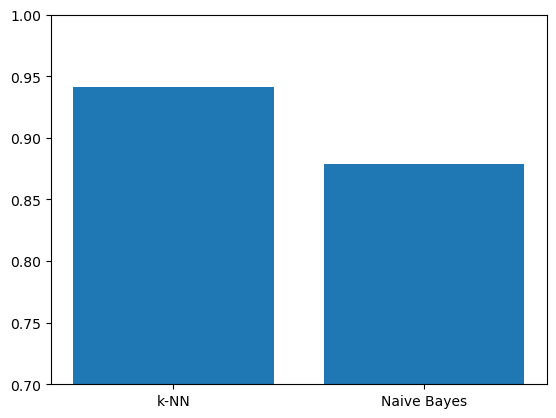

In [45]:
plt.bar(['k-NN', 'Naive Bayes'], nilai_akurasi)
plt.ylim(0.70, 1.00)
plt.show()